In [197]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import operator
from datetime import timedelta

In [130]:
customers = pd.read_csv(r'C:\Users\Honor\Downloads\olist_customers_dataset.csv')

In [131]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [199]:
customers.customer_unique_id.nunique()

96096

In [132]:
orders = pd.read_csv(r'C:\Users\Honor\Downloads\olist_orders_dataset.csv')

In [133]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [134]:
users_orders_merge =  orders.merge(customers, on='customer_id')
users_orders_merge.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [135]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [136]:
num_orders_df = users_orders_merge.query('order_status=="delivered"').groupby('customer_unique_id', as_index=False) \
    .agg({'order_status':'count'}) \
    .rename(columns={'order_status':'num_of_orders'})
num_orders_df = num_orders_df.query('num_of_orders == 1')
num_orders = num_orders_df.shape[0]
num_orders

90557

In [137]:
## за недоставленные заказы принимаем те, у которых отстуствует дата доставки
## далее делим на три причины "canceled", "unavailable", "other".
## в other добавляем те заказы, у которых отстутсвует дата доставки, но при этом заказ не был отменен или недоступен
undelivered_orders = orders[orders['order_delivered_customer_date'].isnull()]
undelivered_orders = undelivered_orders[['order_id','order_status','customer_id','order_purchase_timestamp']]
undelivered_orders['order_purchase_timestamp'] = pd.to_datetime(undelivered_orders['order_purchase_timestamp'])
undelivered_orders['month'] = undelivered_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%B-%Y'))
undelivered_orders = undelivered_orders.groupby(['month','order_status'], as_index=False) \
    .agg({'customer_id':'count'}) \
    .rename(columns={'customer_id':'undelivered'})
undelivered_orders = undelivered_orders.pivot(columns='order_status',index='month',values='undelivered')
undelivered_orders

order_status,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable
month,,,,,,,,
April-2017,1.0,18.0,NaN,NaN,14.0,10.0,49.0,9.0
April-2018,NaN,15.0,NaN,NaN,14.0,8.0,99.0,5.0
August-2017,NaN,27.0,NaN,NaN,20.0,18.0,41.0,32.0
August-2018,NaN,84.0,NaN,NaN,23.0,NaN,47.0,7.0
December-2017,NaN,11.0,2.0,NaN,13.0,35.0,57.0,42.0
February-2017,1.0,17.0,NaN,NaN,11.0,32.0,21.0,45.0
February-2018,NaN,72.0,1.0,NaN,6.0,6.0,57.0,30.0
January-2017,NaN,3.0,NaN,NaN,12.0,9.0,16.0,10.0
January-2018,NaN,34.0,NaN,NaN,15.0,29.0,74.0,48.0


In [138]:
## распределение недоставленных 
undelivered_orders['other'] = undelivered_orders.loc[:, 'created':'shipped'].sum(axis=1) + undelivered_orders.approved
undelivered_orders = undelivered_orders.drop(['approved','created','delivered','invoiced','processing','shipped'], axis=1)

In [139]:
## среднее значение недоставленных заказов в месяц
undelivered_orders.describe().iloc[[1]]

order_status,canceled,unavailable,other
mean,25.791667,29.0,69.5


In [140]:
items = pd.read_csv(r'C:\Users\Honor\Downloads\olist_order_items_dataset.csv')
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [141]:
items.product_id.nunique()

32951

In [142]:
df = orders.merge(items, on='order_id')[['order_purchase_timestamp','product_id']]
df['order_purchase_timestamp'] = pd.to_datetime(df.order_purchase_timestamp).apply(lambda x: x.strftime('%A'))
df = df.rename(columns={'order_purchase_timestamp':'day'})
df = df.groupby(['product_id'], as_index=True) \
    .agg({'day':'value_counts'}) \
    .rename(columns={'day':'quantity'}) \
    .sort_values('product_id') \
    .reset_index() \
    .pivot(index='product_id', columns='day', values='quantity') \
    .fillna(0)
df

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
product_id,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,0.0,0.0,0.0,1.0,0.0,0.0,0.0
00088930e925c41fd95ebfe695fd2655,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0009406fd7479715e4bef61dd91f2462,0.0,0.0,0.0,0.0,1.0,0.0,0.0
000b8f95fcb9e0096488278317764d19,1.0,0.0,0.0,0.0,0.0,0.0,1.0
000d9be29b5207b54e86aa1b1ac54872,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,0.0,0.0,1.0,1.0,0.0,0.0,0.0
fff81cc3158d2725c0655ab9ba0f712c,0.0,1.0,0.0,0.0,0.0,0.0,0.0
fff9553ac224cec9d15d49f5a263411f,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
## день недели, в который каждый товар чаще покупается
product_best_day = df.idxmax(axis=1)
product_best_day

product_id
00066f42aeeb9f3007548bb9d3f33c38       Sunday
00088930e925c41fd95ebfe695fd2655      Tuesday
0009406fd7479715e4bef61dd91f2462     Thursday
000b8f95fcb9e0096488278317764d19       Friday
000d9be29b5207b54e86aa1b1ac54872      Tuesday
                                      ...    
fff6177642830a9a94a0f2cba5e476d1     Saturday
fff81cc3158d2725c0655ab9ba0f712c       Monday
fff9553ac224cec9d15d49f5a263411f       Friday
fffdb2d0ec8d6a61f0a0a0db3f25b441      Tuesday
fffe9eeff12fcbd74a2f2b007dde0c58    Wednesday
Length: 32951, dtype: object

In [144]:
users_orders_merge.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [145]:
users_orders_merge['num_days_in_month'] = pd.to_datetime(users_orders_merge.order_purchase_timestamp).dt.days_in_month
users_orders_merge['weeks'] = (users_orders_merge.num_days_in_month / 7).round(2)
users_orders_merge['order_purchase_timestamp'] = pd.to_datetime(users_orders_merge.order_purchase_timestamp)
users_orders_merge['month'] = users_orders_merge.order_purchase_timestamp.apply(lambda x: x.strftime('%B'))
users_orders_merge.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,num_days_in_month,weeks,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,31,4.43,October
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31,4.43,July
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,31,4.43,August
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,30,4.29,November
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,28,4.00,February


In [146]:
df4 = users_orders_merge.groupby(['customer_unique_id', 'month', 'weeks'], as_index=False) \
                    .agg({'order_id':'count'}) \
                    .rename(columns = {'order_id':'purchases'}) \
                    .sort_values('purchases', ascending=False)
df4['purchases_per_week'] = df4.purchases/df4.weeks
df4

,customer_unique_id,month,weeks,purchases,purchases_per_week
7322,12f5d6e1cbf93dafd9dcc19095df0b3d,January,4.43,6,1.354402
54007,8d50f5eadf50201ccdcedfb9e2ac8455,July,4.43,5,1.128668
14483,25a560b9a6006157838aab1bdbd68624,April,4.29,4,0.932401
50598,83e7958a94bd7f74a9414d8782f87628,January,4.43,4,0.902935
69362,b4e4f24de1e8725b74e4a1f4975116ed,February,4.00,4,1.000000
...,...,...,...,...,...
32863,55a97ac4a03a60a3a30e1d7a9423b911,October,4.43,1,0.225734
32862,55a82b1881c249c04755d69057227ece,June,4.29,1,0.233100
32861,55a5d857599f61f045f9956f9180262d,July,4.43,1,0.225734
32860,55a55b65ef7f279bf0e5846a645e5ba6,December,4.43,1,0.225734


In [147]:
## среднее кол-во покупок каждого пользователя в неделю за каждый месяц
purchases_per_week_by_month = df4.pivot(index='customer_unique_id', columns='month', values='purchases_per_week') \
                                .fillna(0)
purchases_per_week_by_month.head()

month,April,August,December,February,January,July,June,March,May,November,October,September
customer_unique_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.225734,0.0000,0.000000,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.225734,0.0000,0.000000,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.225734,0.000000,0.0000,0.000000,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0000,0.225734,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.2331,0.000000,0.0


когортный анализ retention rate
т.к. датасет не содержит данные о времени регистрации пользователей, создаем когорты на основе данных о первой покупке юзера

In [177]:
df5 =  orders.merge(customers, on='customer_id', how='left')

In [178]:
df5['month'] = df5.order_purchase_timestamp.apply(lambda x: x[:7])

In [179]:
df5 = df5.merge(df5.groupby('customer_unique_id', as_index=False).month.min().rename(columns=({'month':'cohort'})), \
                on='customer_unique_id', \
                how='left')
df5['retention_month'] = df5.groupby('customer_unique_id', as_index=False).month.cumcount()

In [185]:
df5['retention'] = 1

In [183]:
df5 = pd.pivot_table(df5, columns='retention_month', index='cohort', values='retention', aggfunc=np.sum)

In [189]:
df5 = df5.div(df5[0], axis=0).drop('retention', axis=1)
df5

retention_month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
cohort,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,0.037383,0.003115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.075916,0.013089,0.002618,0.001309,0.001309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,1.0,0.041667,0.003995,0.000571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,1.0,0.049317,0.006449,0.001138,0.000379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04,1.0,0.045918,0.004252,0.000425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05,1.0,0.055061,0.007786,0.001669,0.000834,0.000834,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278
2017-06,1.0,0.055113,0.004141,0.000637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


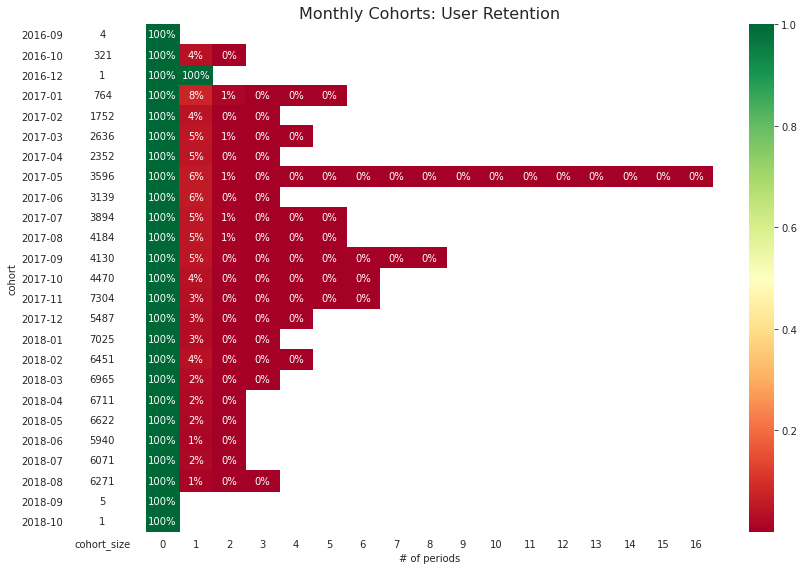

In [190]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    sns.heatmap(df5, 
                mask=df5.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

In [195]:
df6 = users_orders_merge.merge(items, on='order_id', how='left')
df6['order_purchase_timestamp'] = pd.to_datetime(df6.order_purchase_timestamp)
df6

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,customer_state,num_days_in_month,weeks,month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,SP,31,4.43,October,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,BA,31,4.43,July,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,GO,31,4.43,August,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,RN,30,4.29,November,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,SP,28,4.00,February,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,SP,28,4.00,February,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,BA,31,4.43,August,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,RJ,31,4.43,January,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,RJ,31,4.43,January,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


RFM сегментация пользователей (recency-кол-во дней от последней покупки до текущей даты
frequency-кол-во покупок
monetary-сумма денег, полученная от юзера за все время

In [203]:
last_date = df6.order_purchase_timestamp.max() + timedelta(days=1)
rfm_df = df6.groupby('customer_unique_id', as_index=False) \
            .agg({'order_purchase_timestamp':lambda x:(last_date-x.max()).days,
                 'order_id':'count',
                 'price':'sum'}) \
            .rename(columns={'order_purchase_timestamp':'recency',
                            'order_id':'frequency',
                            'price':'monetary'})
rfm_df

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90
2,0000f46a3911fa3c0805444483337064,586,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00
...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,496,2,1570.00
96092,fffea47cd6d3cc0a88bd621562a9d061,311,1,64.89
96093,ffff371b4d645b6ecea244b27531430a,618,1,89.90
96094,ffff5962728ec6157033ef9805bacc48,169,1,115.00


In [209]:
quantiles = rfm_df.quantile(q=[0.20, 0.40, 0.60, 0.80])
quantiles = quantiles.to_dict()
segmented_rfm = rfm_df

def RScore(x,p,d):
     if x <= d[p][0.20]:
         return 1
     elif x <= d[p][0.40]:
         return 2
     elif x <= d[p][0.60]: 
         return 3
     elif x<=d[p][0.80]:
         return 4
     else:
         return 5

segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(RScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary'].apply(RScore, args=('monetary',quantiles,))
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,customer_unique_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90,2,1,4,214
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90,2,1,1,211
2,0000f46a3911fa3c0805444483337064,586,1,69.00,5,1,2,512
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99,4,1,1,411
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00,4,1,5,415
